In [1]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests
from ast import literal_eval
import glob
import datetime


# project_csv

In [2]:
project_csv = pd.read_csv('../data/Hot-Stuff.csv')
project_csv

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


In [3]:
project_csv = project_csv.dropna()
project_csv

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


In [4]:
new_csvs = pd.concat([pd.read_csv(x)for x in glob.glob('../csvs_6/*.csv')], ignore_index = True)
new_csvs

,0,1,2,3,4,5
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963
28386,NaN,NaN,NaN,NaN,NaN,NaN
28387,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
new_csvs = new_csvs.dropna()
new_csvs

,0,1,2,3,4,5
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28380,False,41.0,Nocera,"Summertime, Summertime",206613.0,spotify:track:4tSteFXglCBaG6sFvYCBVX
28381,False,1.0,Andy Williams,Do You Mind - 1960 #70 Billboard chart hit,136560.0,spotify:track:4yzLxHEO5nPKwxjGYLF5xI
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963


In [6]:
new_csvs.columns = ['Explicit', 'Song_Popularity', 'Performer', 'Song', 'Duration ms', 'uri' ]
new_csvs

,Explicit,Song_Popularity,Performer,Song,Duration ms,uri
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28380,False,41.0,Nocera,"Summertime, Summertime",206613.0,spotify:track:4tSteFXglCBaG6sFvYCBVX
28381,False,1.0,Andy Williams,Do You Mind - 1960 #70 Billboard chart hit,136560.0,spotify:track:4yzLxHEO5nPKwxjGYLF5xI
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963


In [7]:
genre_csvs = pd.concat([pd.read_csv(x)for x in glob.glob('../genre_csvs/*.csv')], ignore_index = True)
genre_csvs

,0,1,2,3,4
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
1,NaN,NaN,NaN,NaN,NaN
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"
10058,NaN,NaN,NaN,NaN,NaN
10059,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[]


In [8]:
genre_csvs = genre_csvs.dropna()
genre_csvs 

,0,1,2,3,4
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
5,Kris Allen,44.0,Kris Allen,spotify:artist:2zwHaEmXxX6DTv4i8ajNCM,"['acoustic pop', 'idol', 'neo mellow', 'post-t..."
6,The Swon Brothers,33.0,The Swon Brothers,spotify:artist:1nf0nRF0W4ybnJdda00pKY,"['contemporary country', 'country pop', 'oklah..."
...,...,...,...,...,...
10053,Judson Spence,4.0,Judson Spence,spotify:artist:2iDXfUayTfaawalL8HDDj6,[]
10055,Mongo Santamaria Orch.,46.0,Mongo Santamaria,spotify:artist:2oVwztjpHpJlAvlVVuqVa0,"['afro-cuban percussion', 'boogaloo', 'cuban r..."
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"


In [9]:
genre_csvs.columns = ['Performer', 'Artist_Popularity', 'Performer2', 'uri', 'Genre' ]

In [10]:
genre_csvs[['Performer', 'Genre', 'Artist_Popularity']]

,Performer,Genre,Artist_Popularity
0,Lindsay Lohan,"['dance pop', 'post-teen pop']",49.0
2,Incubus,"['alternative metal', 'alternative rock', 'fun...",69.0
3,Zac Efron,"['hollywood', 'pop', 'post-teen pop', 'show tu...",69.0
5,Kris Allen,"['acoustic pop', 'idol', 'neo mellow', 'post-t...",44.0
6,The Swon Brothers,"['contemporary country', 'country pop', 'oklah...",33.0
...,...,...,...
10053,Judson Spence,[],4.0
10055,Mongo Santamaria Orch.,"['afro-cuban percussion', 'boogaloo', 'cuban r...",46.0
10056,The Yellow Balloon,"['bubblegum pop', 'freakbeat', 'sunshine pop']",22.0
10057,Ant Saunders,"['chill r&b', 'pop']",53.0


In [11]:
genre_csvs

,Performer,Artist_Popularity,Performer2,uri,Genre
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
5,Kris Allen,44.0,Kris Allen,spotify:artist:2zwHaEmXxX6DTv4i8ajNCM,"['acoustic pop', 'idol', 'neo mellow', 'post-t..."
6,The Swon Brothers,33.0,The Swon Brothers,spotify:artist:1nf0nRF0W4ybnJdda00pKY,"['contemporary country', 'country pop', 'oklah..."
...,...,...,...,...,...
10053,Judson Spence,4.0,Judson Spence,spotify:artist:2iDXfUayTfaawalL8HDDj6,[]
10055,Mongo Santamaria Orch.,46.0,Mongo Santamaria,spotify:artist:2oVwztjpHpJlAvlVVuqVa0,"['afro-cuban percussion', 'boogaloo', 'cuban r..."
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"


In [12]:
genre_csvs = genre_csvs.loc[genre_csvs['Performer']==genre_csvs['Performer2']]

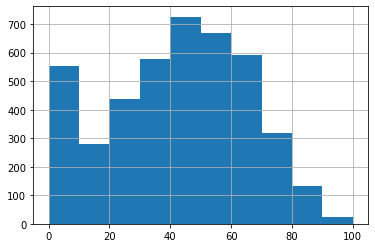

In [13]:
genre_csvs['Artist_Popularity'].hist();

In [14]:
top_genres = genre_csvs.loc[genre_csvs['Artist_Popularity']>=90].sort_values('Artist_Popularity', ascending = False)
top_genres

,Performer,Artist_Popularity,Performer2,uri,Genre
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']"
3065,Taylor Swift,99.0,Taylor Swift,spotify:artist:06HL4z0CvFAxyc27GXpf02,['pop']
3056,The Weeknd,97.0,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ..."
3353,Drake,97.0,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,"['canadian hip hop', 'canadian pop', 'hip hop'..."
806,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']"
3061,21 Savage,94.0,21 Savage,spotify:artist:1URnnhqYAYcrqrcwql10ft,"['atl hip hop', 'rap']"
3067,Eminem,93.0,Eminem,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,"['detroit hip hop', 'hip hop', 'rap']"
3474,BTS,93.0,BTS,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,"['k-pop', 'k-pop boy group']"
3446,Ed Sheeran,92.0,Ed Sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,"['pop', 'uk pop']"
3222,Justin Bieber,92.0,Justin Bieber,spotify:artist:1uNFoZAHBGtllmzznpCI3s,"['canadian pop', 'pop']"


In [15]:
top_genres['Genre'] = top_genres['Genre'].apply(literal_eval)
top_genres = top_genres.explode(column = "Genre")
top_genres = top_genres.dropna()
top_genres

,Performer,Artist_Popularity,Performer2,uri,Genre
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,reggaeton
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,trap latino
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,urbano latino
3065,Taylor Swift,99.0,Taylor Swift,spotify:artist:06HL4z0CvFAxyc27GXpf02,pop
3056,The Weeknd,97.0,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b
...,...,...,...,...,...
3963,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,pop
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,puerto rican pop
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,reggaeton
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,trap latino


In [16]:
top_genres.drop_duplicates()

,Performer,Artist_Popularity,Performer2,uri,Genre
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,reggaeton
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,trap latino
2324,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,urbano latino
3065,Taylor Swift,99.0,Taylor Swift,spotify:artist:06HL4z0CvFAxyc27GXpf02,pop
3056,The Weeknd,97.0,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b
...,...,...,...,...,...
3963,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,pop
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,puerto rican pop
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,reggaeton
4269,Ozuna,90.0,Ozuna,spotify:artist:1i8SpTcr7yvPOmcqrbnVXY,trap latino


In [17]:
top_genres = top_genres.value_counts('Genre')
pd.DataFrame(top_genres)

,0
Genre,
pop,11
rap,8
dance pop,4
atl hip hop,3
canadian pop,3
hip hop,3
r&b,2
reggaeton,2
art pop,2


In [18]:
# genre_csvs['Genre'] = genre_csvs['Genre'].apply(literal_eval)

In [19]:
# genre_csvs = genre_csvs.explode(column = "Genre")
# genre_csvs = genre_csvs.dropna()

In [20]:
#popular_genres = genres_csvs['Genre'].value_counts().head(100).index.to_list()
#popular_genres

In [21]:
#popular_genres = genres_csvs['Genre'].value_counts().head(100).index.to_list()
#popular_genres

In [22]:
# genre_graph = genres_csvs.loc[genres_csvs['Genre'].isin(popular_genres)].plot(figsize=(10,6),
#                              x= 'Genre',
#                              y= 'Artist_Popularity',
#                              title = 'Genre Popularity',
#                              xlabel = 'Genre',
#                              ylabel = 'Popularity',
#                              kind = 'scatter',
#                              color = 'cadetblue',
                             
#                              alpha = 0.8)
# for bars in genre_graph.containers:
#     genre_graph.bar_label(scatter)
# plt.xticks(rotation = 90);

# song csv

In [23]:
merged_df = genre_csvs.merge(project_csv, how = 'inner', on = ['Performer'])
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/3/2005,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/10/2005,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/17/2005,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/24/2005,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/31/2005,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,57.0,57,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196968,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/7/1961,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2
196969,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/14/1961,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3
196970,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/21/1961,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4
196971,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/28/1961,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5


In [24]:
merged_df['WeekID'] = pd.to_datetime(merged_df['WeekID'])

In [25]:
merged_df['Year'] = merged_df['WeekID'].dt.year
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-03,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2,2005
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-10,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3,2005
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-17,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4,2005
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-24,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5,2005
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-31,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,57.0,57,6,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196968,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-07,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2,1961
196969,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-14,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3,1961
196970,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-21,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4,1961
196971,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-28,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5,1961


In [26]:
merged_df.loc[(merged_df['Year']>=1950)&(merged_df['Year']<=1959),'Genre']
merged_df.loc[(merged_df['Year']>=1960)&(merged_df['Year']<=1969),'Genre']
merged_df.loc[(merged_df['Year']>=1970)&(merged_df['Year']<=1979),'Genre']
merged_df.loc[(merged_df['Year']>=1980)&(merged_df['Year']<=1989),'Genre']
merged_df.loc[(merged_df['Year']>=1990)&(merged_df['Year']<=1999),'Genre']
merged_df.loc[(merged_df['Year']>=2000)&(merged_df['Year']<=2009),'Genre']
merged_df.loc[(merged_df['Year']>=2010)&(merged_df['Year']<=2019),'Genre']
merged_df.loc[(merged_df['Year']>=2020)&(merged_df['Year']<=2029),'Genre']
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-03,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2,2005
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-10,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3,2005
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-17,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4,2005
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-24,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5,2005
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-31,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,57.0,57,6,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196968,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-07,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2,1961
196969,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-14,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3,1961
196970,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-21,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4,1961
196971,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-28,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5,1961


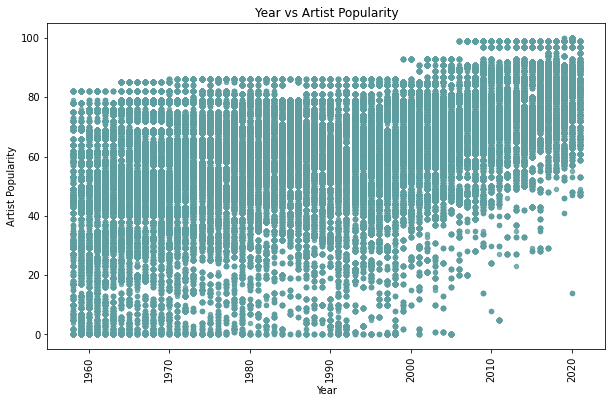

In [27]:
genre_graph = merged_df.plot(figsize=(10,6),
                             x= 'Year',
                             y= 'Artist_Popularity',
                             title = 'Year vs Artist Popularity',
                             xlabel = 'Year',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             
                             alpha = 0.8)
for bars in genre_graph.containers:
    genre_graph.bar_label(scatter)
plt.xticks(rotation = 90);

In [28]:
merged_df.loc[(merged_df['Year']>=1950)&(merged_df['Year']<=1959),'Decade']="1950's"
merged_df.loc[(merged_df['Year']>=1960)&(merged_df['Year']<=1969),'Decade']="1960's"
merged_df.loc[(merged_df['Year']>=1970)&(merged_df['Year']<=1979),'Decade']="1970's"
merged_df.loc[(merged_df['Year']>=1980)&(merged_df['Year']<=1989),'Decade']="1980's"
merged_df.loc[(merged_df['Year']>=1990)&(merged_df['Year']<=1999),'Decade']="1990's"
merged_df.loc[(merged_df['Year']>=2000)&(merged_df['Year']<=2009),'Decade']="2000's"
merged_df.loc[(merged_df['Year']>=2010)&(merged_df['Year']<=2019),'Decade']="2010's"
merged_df.loc[(merged_df['Year']>=2020)&(merged_df['Year']<=2029),'Decade']="2020's"
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-03,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2,2005,2000's
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-10,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3,2005,2000's
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-17,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4,2005,2000's
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-24,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5,2005,2000's
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-31,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,57.0,57,6,2005,2000's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196968,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-07,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2,1961,1960's
196969,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-14,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3,1961,1960's
196970,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-21,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4,1961,1960's
196971,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1961-01-28,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5,1961,1960's


In [29]:
weeks = merged_df.value_counts(['Performer', 'Weeks on Chart'])
weeks
weeks = pd.DataFrame(weeks)
weeks

0
Performer       Weeks on Chart    
Drake           2               65
The Beatles     2               62
                3               61
Aretha Franklin 2               61
The Beatles     4               60
...                             ..
Jordan Knight   19               1
                20               1
Jordan Pruitt   3                1
                4                1
will.i.am       9                1

[60865 rows x 1 columns]

In [30]:
large_number = merged_df.value_counts(['Performer', 'Song'])
large_number

Performer                         Song                          
Imagine Dragons                   Radioactive                       85
AWOLNATION                        Sail                              77
Jason Mraz                        I'm Yours                         75
The Weeknd                        Blinding Lights                   74
LeAnn Rimes                       How Do I Live                     68
                                                                    ..
Tommy Edwards                     It's Not The End Of Everything     1
Country Joe & The Fish            Not So Sweet Martha Lorraine       1
Nicki Minaj                       Yikes                              1
Cornelius Brothers & Sister Rose  Let Me Down Easy                   1
The O'Jays                        Looky Looky (Look At Me Girl)      1
Length: 17673, dtype: int64

In [31]:
decade_boxplot = sns.boxplot(data=merged_df, x = "Decade", y = "Song_Popularity")

ValueError: Could not interpret input 'Song_Popularity'

In [ ]:
decade_boxplot = sns.boxplot(data=merged_df, x = "Decade", y = "Duration ms")

In [ ]:
decade_boxplot = sns.boxplot(data=merged_df, x = "Decade", y = "Artist_Popularity")

In [ ]:
debut_df = merged_df.sort_values('WeekID').drop_duplicates('Performer')
debut_df

In [ ]:
debut_df.groupby('Decade')['Artist_Popularity'].mean()

In [ ]:
debut_df.groupby('Decade')['Artist_Popularity'].describe()

In [ ]:
sns.boxplot(data=debut_df, x = "Decade", y = "Artist_Popularity")

In [ ]:
merged_df_peak = merged_df.drop_duplicates(subset = 'uri', keep='first')
merged_df_peak

In [ ]:
merged_df_1970 = merged_df.loc[merged_df['Year']>=1970].loc[merged_df['Year']<=1979].drop_duplicates(subset = 'SongID', keep = 'first')

In [ ]:
merged_df_1970

In [ ]:
peak_df = merged_df.sort_values('Peak Position', ascending = True).drop_duplicates(subset = 'Performer', keep='first')

In [ ]:
peak_df.loc[peak_df['Peak Position']<=90].loc[peak_df['Artist_Popularity']>=99]

In [ ]:
genre_graph = peak_df.plot(figsize=(10,6),
                             x= 'Peak Position',
                             y= 'Artist_Popularity',
                             title = 'Peak Position vs Artist Popularity',
                             xlabel = 'Peak Position',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             
                             alpha = 0.8)
for bars in genre_graph.containers:
    genre_graph.bar_label(scatter)
plt.xticks(rotation = 90);

In [ ]:
genre_graph = merged_df.plot(figsize=(10,6),
                             x= 'Year',
                             y= 'Artist_Popularity',
                             title = 'Year vs Artist Popularity',
                             xlabel = 'Year',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             
                             alpha = 0.8)
for bars in genre_graph.containers:
    genre_graph.bar_label(scatter)
plt.xticks(rotation = 90);

In [32]:
merged_df = merged_df.merge(new_csvs, how = 'inner', on = ['Performer'])
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-03,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,66.0,58,2,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-10,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,58.0,58,3,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-17,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,87.0,58,4,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-24,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,91.0,57,5,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-31,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,57.0,57,6,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415949,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,84,Yellow Hearts,Yellow HeartsAnt Saunders,...,90.0,81,4,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415950,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,95,Yellow Hearts,Yellow HeartsAnt Saunders,...,84.0,81,5,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415951,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,95,Yellow Hearts,Yellow HeartsAnt Saunders,...,95.0,81,6,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415952,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-04,94,Yellow Hearts,Yellow HeartsAnt Saunders,...,95.0,81,7,2020,2020's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl


In [33]:
checkpoint = merged_df.loc[merged_df['Artist_Popularity']>=90]
checkpoint

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
97022,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",http://www.billboard.com/charts/hot-100/2017-0...,2017-08-26,75,The Weekend,The WeekendSZA,...,89.0,75,2,2017,2010's,True,78.0,The Weekend,272186.0,spotify:track:6gU9OKjOE7ghfEd55oRO57
97023,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",http://www.billboard.com/charts/hot-100/2017-0...,2017-08-26,75,The Weekend,The WeekendSZA,...,89.0,75,2,2017,2010's,True,79.0,Broken Clocks,231253.0,spotify:track:2fXwCWkh6YG5zU1IyvQrbs
97024,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",http://www.billboard.com/charts/hot-100/2017-0...,2017-09-02,75,The Weekend,The WeekendSZA,...,75.0,75,3,2017,2010's,True,78.0,The Weekend,272186.0,spotify:track:6gU9OKjOE7ghfEd55oRO57
97025,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",http://www.billboard.com/charts/hot-100/2017-0...,2017-09-02,75,The Weekend,The WeekendSZA,...,75.0,75,3,2017,2010's,True,79.0,Broken Clocks,231253.0,spotify:track:2fXwCWkh6YG5zU1IyvQrbs
97026,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",http://www.billboard.com/charts/hot-100/2017-0...,2017-09-09,72,The Weekend,The WeekendSZA,...,75.0,72,4,2017,2010's,True,78.0,The Weekend,272186.0,spotify:track:6gU9OKjOE7ghfEd55oRO57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305837,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,"['art pop', 'pop']",http://www.billboard.com/charts/hot-100/2013-1...,2013-10-12,83,Young And Beautiful,Young And BeautifulLana Del Rey,...,79.0,57,21,2013,2010's,False,72.0,Ultraviolence,251480.0,spotify:track:1y3r6RXiJZNBV1EI0NggpS
2305838,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,"['art pop', 'pop']",http://www.billboard.com/charts/hot-100/2013-1...,2013-10-12,83,Young And Beautiful,Young And BeautifulLana Del Rey,...,79.0,57,21,2013,2010's,False,69.0,Video Games,281960.0,spotify:track:24jvD83UgLmrdGjhWTFslY
2305839,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,"['art pop', 'pop']",http://www.billboard.com/charts/hot-100/2013-1...,2013-10-12,83,Young And Beautiful,Young And BeautifulLana Del Rey,...,79.0,57,21,2013,2010's,False,5.0,Summertime Sadness (Lana Del Rey Vs. Cedric Ge...,214912.0,spotify:track:5lu3zAHbQKwcCQRls0kxW8
2305840,Lana Del Rey,90.0,Lana Del Rey,spotify:artist:00FQb4jTyendYWaN8pK0wa,"['art pop', 'pop']",http://www.billboard.com/charts/hot-100/2013-1...,2013-10-12,83,Young And Beautiful,Young And BeautifulLana Del Rey,...,79.0,57,21,2013,2010's,False,83.0,Young And Beautiful,236053.0,spotify:track:2nMeu6UenVvwUktBCpLMK9


In [34]:
checkpoint['Duration m'] = checkpoint['Duration ms']/1000/60


/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_3872/3361296367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  checkpoint['Duration m'] = checkpoint['Duration ms']/1000/60


In [35]:
genre_graph_100 = peak_df.plot(figsize=(20,10),
                             x= 'Decade',
                             y= 'Duration m',
                             title = 'Duration vs Artist Popularity',
                             xlabel = 'Duration',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

NameError: name 'peak_df' is not defined

In [ ]:
time_df = peak_df.head(100)

In [ ]:
genre_graph_100 = time_df.plot(figsize=(20,10),
                             x= 'Duration m',
                             y= 'Artist_Popularity',
                             title = 'Duration vs Artist Popularity',
                             xlabel = 'Duration',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [36]:
peak_df = peak_df.drop_duplicates(subset = 'uri_x', keep = 'first')

NameError: name 'peak_df' is not defined

In [ ]:
peak_df = peak_df.head(20)
peak_df

In [ ]:
peak_df = peak_df.sort_values('Artist_Popularity', ascending = False)

In [ ]:
boxplot = sns.boxplot(data=peak_df, x = "Artist_Popularity", y = "Duration m")
plt.setp(boxplot.get_xticklabels(), rotation = 90)

In [38]:
merged_df2 = merged_df.drop_duplicates()
merged_df2

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-03,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,66.0,58,2,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-10,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,58.0,58,3,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-17,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,87.0,58,4,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-24,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,91.0,57,5,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,2005-12-31,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,...,57.0,57,6,2005,2000's,False,45.0,Confessions Of A Broken Heart (Daughter To Fat...,220800.0,spotify:track:0x7663BmBYv7m1ejUzXHfd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415949,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,84,Yellow Hearts,Yellow HeartsAnt Saunders,...,90.0,81,4,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415950,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,95,Yellow Hearts,Yellow HeartsAnt Saunders,...,84.0,81,5,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415951,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,95,Yellow Hearts,Yellow HeartsAnt Saunders,...,95.0,81,6,2019,2010's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
2415952,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-04,94,Yellow Hearts,Yellow HeartsAnt Saunders,...,95.0,81,7,2020,2020's,False,65.0,Yellow Hearts,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl


In [39]:
merged_df = merged_df2.sort_values('Artist_Popularity', ascending = False)
merged_df = pd.DataFrame(merged_df)
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
311822,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-11,83,Vete,VeteBad Bunny,...,91.0,33,6,2020,2020's,True,65.0,MALDITA POBREZA,213609.0,spotify:track:0Lsis3LB0XAK6XlTHXaJk2
312019,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,74.0,Soliá,159282.0,spotify:track:7sOfmPd18RWp3FoCzpa7Kw
312017,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,77.0,La Difícil,163084.0,spotify:track:6NfrH0ANGmgBXyxgV2PeXt
312016,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,False,78.0,Yo Perreo Sola,172127.0,spotify:track:0SqqAgdovOE24BzxIClpjw
312015,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,77.0,Vete,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499169,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-08-10,34,Alice Long (You're Still My Favorite Girlfriend),Alice Long (You're Still My Favorite Girlfrien...,...,34.0,34,6,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499170,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-09-07,39,Alice Long (You're Still My Favorite Girlfriend),Alice Long (You're Still My Favorite Girlfrien...,...,27.0,27,10,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499171,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-04-13,64,Goodbye Baby (I Don't Want To See You Cry),Goodbye Baby (I Don't Want To See You Cry)Tomm...,...,70.0,64,2,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499172,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1967-1...,1967-12-30,72,I Wonder What She's Doing Tonite,I Wonder What She's Doing ToniteTommy Boyce & ...,...,87.0,72,2,1967,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP


In [40]:
merged_df = merged_df.explode(column = "Genre")
merged_df = merged_df.dropna()
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
311822,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-11,83,Vete,VeteBad Bunny,...,91.0,33,6,2020,2020's,True,65.0,MALDITA POBREZA,213609.0,spotify:track:0Lsis3LB0XAK6XlTHXaJk2
312019,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,74.0,Soliá,159282.0,spotify:track:7sOfmPd18RWp3FoCzpa7Kw
312017,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,77.0,La Difícil,163084.0,spotify:track:6NfrH0ANGmgBXyxgV2PeXt
312016,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,False,78.0,Yo Perreo Sola,172127.0,spotify:track:0SqqAgdovOE24BzxIClpjw
312015,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-04-11,89,Si Veo A Tu Mama,Si Veo A Tu MamaBad Bunny,...,92.0,32,5,2020,2020's,True,77.0,Vete,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499169,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-08-10,34,Alice Long (You're Still My Favorite Girlfriend),Alice Long (You're Still My Favorite Girlfrien...,...,34.0,34,6,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499170,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-09-07,39,Alice Long (You're Still My Favorite Girlfriend),Alice Long (You're Still My Favorite Girlfrien...,...,27.0,27,10,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499171,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1968-0...,1968-04-13,64,Goodbye Baby (I Don't Want To See You Cry),Goodbye Baby (I Don't Want To See You Cry)Tomm...,...,70.0,64,2,1968,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP
499172,Tommy Boyce & Bobby Hart,0.0,Tommy Boyce & Bobby Hart,spotify:artist:6rM7lWz000LXcXvCLFZAwD,['bubblegum pop'],http://www.billboard.com/charts/hot-100/1967-1...,1967-12-30,72,I Wonder What She's Doing Tonite,I Wonder What She's Doing ToniteTommy Boyce & ...,...,87.0,72,2,1967,1960's,False,1.0,Alice Long (You're Still My Favorite Girlfriend),167510.0,spotify:track:62p7G9sDTisnbtns0IWXIP


In [41]:
merged_df_final = merged_df.drop_duplicates(subset = 'uri_x', keep='first')
merged_df_final

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
311822,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-11,83,Vete,VeteBad Bunny,...,91.0,33,6,2020,2020's,True,65.0,MALDITA POBREZA,213609.0,spotify:track:0Lsis3LB0XAK6XlTHXaJk2
710911,Taylor Swift,99.0,Taylor Swift,spotify:artist:06HL4z0CvFAxyc27GXpf02,['pop'],http://www.billboard.com/charts/hot-100/2011-1...,2011-11-12,46,Sparks Fly,Sparks FlyTaylor Swift,...,49.0,46,14,2011,2010's,False,64.0,Hey Stephen (Taylor’s Version),254254.0,spotify:track:550erGcdD9n6PnwxrvYqZT
1553621,Drake,97.0,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,"['canadian hip hop', 'canadian pop', 'hip hop'...",http://www.billboard.com/charts/hot-100/2016-0...,2016-07-23,95,Still Here,Still HereDrake,...,93.0,40,10,2016,2010's,True,77.0,Headlines,235986.0,spotify:track:6LxSe8YmdPxy095Ux6znaQ
660731,The Weeknd,97.0,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,"['canadian contemporary r&b', 'canadian pop', ...",https://www.billboard.com/charts/hot-100/2020-...,2020-04-04,4,Heartless,HeartlessThe Weeknd,...,16.0,1,18,2020,2020's,True,69.0,Faith,283226.0,spotify:track:3orEOtd8CPL8GFlpRpKuoE
97092,SZA,95.0,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,"['pop', 'r&b']",https://www.billboard.com/charts/hot-100/2018-...,2018-04-21,97,Broken Clocks,Broken ClocksSZA,...,82.0,82,3,2018,2010's,True,78.0,The Weekend,272186.0,spotify:track:6gU9OKjOE7ghfEd55oRO57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408403,The Mickey Mozart Quintet,0.0,The Mickey Mozart Quintet,spotify:artist:34KsVYiasUf7YuZBqe23j6,[],http://www.billboard.com/charts/hot-100/1959-0...,1959-07-04,30,Little Dipper,Little DipperThe Mickey Mozart Quintet,...,33.0,30,7,1959,1950's,False,0.0,Little Dipper,118530.0,spotify:track:1u5oyDBPbN4V5ZncG2SYaF
2355452,Dorothy Morrison,0.0,Dorothy Morrison,spotify:artist:0jdxrfshnXccVoDXIEmUlJ,[],http://www.billboard.com/charts/hot-100/1970-1...,1970-11-07,99,Spirit In The Sky,Spirit In The SkyDorothy Morrison,...,99.0,99,2,1970,1970's,False,4.0,Spirit In the Sky,194853.0,spotify:track:31Nq0jzIq0PTgzamySP07Y
2376044,Anna King,0.0,Anna King,spotify:artist:3MQ6Mwcq3DFRQzWX4tC1dD,[],http://www.billboard.com/charts/hot-100/1964-0...,1964-01-25,72,If Somebody Told You,If Somebody Told YouAnna King,...,67.0,67,4,1964,1960's,False,13.0,If Somebody Told You,177266.0,spotify:track:0K4019RRyJNxDgsbm0lUXe
2383339,Charm Farm,0.0,Charm Farm,spotify:artist:0m68X70Axb32Yh4fOaHEUO,[],http://www.billboard.com/charts/hot-100/1996-0...,1996-09-28,95,Superstar,SuperstarCharm Farm,...,98.0,95,2,1996,1990's,False,3.0,Superstar,310573.0,spotify:track:6PqyhscBTXR7SIVmnofn5k


In [42]:
merged_df_final['Genre'] = merged_df_final['Genre'].apply(literal_eval)
merged_df_final = merged_df_final.explode(column = "Genre")
merged_df_final = merged_df_final.dropna()
popular_genres = merged_df_final.sort_values('Genre',ascending = True)
popular_genres

/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_3872/3273314596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_final['Genre'] = merged_df_final['Genre'].apply(literal_eval)


,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song_x,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Explicit,Song_Popularity,Song_y,Duration ms,uri_y
5964,The Manhattan Transfer,50.0,The Manhattan Transfer,spotify:artist:2dogRElUKV20C2khRHqjRc,a cappella,http://www.billboard.com/charts/hot-100/1983-0...,1983-09-24,64,Spice Of Life,Spice Of LifeThe Manhattan Transfer,...,73.0,64,3,1983,1980's,False,23.0,"Route 66 - Live At Nakano Sun Plaza, Tokyo, JP...",177306.0,spotify:track:6G2K7HJr3stKP4gInB9rfW
2391322,The Nylons,30.0,The Nylons,spotify:artist:6l0IHrGPjoSzh1Qy3w6X1X,a cappella,http://www.billboard.com/charts/hot-100/1987-0...,1987-07-25,13,Kiss Him Goodbye,Kiss Him GoodbyeThe Nylons,...,14.0,13,11,1987,1980's,False,25.0,Happy Together,169733.0,spotify:track:6GNJWdk0XDPdBMeJlpm2Lg
94409,Pentatonix,77.0,Pentatonix,spotify:artist:26AHtbjWKiwYzsoGoUZq53,a cappella,http://www.billboard.com/charts/hot-100/2015-0...,2015-01-03,58,"Mary, Did You Know?","Mary, Did You Know?Pentatonix",...,48.0,26,5,2015,2010's,False,69.0,"Mary, Did You Know?",203373.0,spotify:track:4z8sz6E4YyFuEkv5o7IJni
2352980,The Timelords,21.0,The Timelords,spotify:artist:54WvhTxDLZMlQYfbl4M1Cp,acid house,http://www.billboard.com/charts/hot-100/1989-0...,1989-02-18,75,Doctorin' The Tardis,Doctorin' The TardisThe Timelords,...,68.0,66,10,1989,1980's,False,38.0,Doctorin’ The Tardis,215941.0,spotify:track:6hfhpzt01E2XWBrEx8orNx
2414633,The Shamen,44.0,The Shamen,spotify:artist:5E704N5StxMVKpalhaJ5L3,acid house,http://www.billboard.com/charts/hot-100/1992-0...,1992-03-28,72,Move Any Mountain,Move Any MountainThe Shamen,...,66.0,38,16,1992,1990's,False,30.0,Move Any Mountain (Beat Edit),208560.0,spotify:track:6l26mQLF7A4lu9djfIez7O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460393,Godley & Creme,35.0,Godley & Creme,spotify:artist:02zGgCB9SiSPeDYMfwPJXK,zolo,http://www.billboard.com/charts/hot-100/1985-0...,1985-07-27,80,Cry,CryGodley & Creme,...,90.0,80,2,1985,1980's,False,47.0,Cry,236533.0,spotify:track:3XfCNac1soQxgfNen0D0dN
228419,The Tubes,46.0,The Tubes,spotify:artist:7zfhej6FnVXN9LIXs6dcoK,zolo,http://www.billboard.com/charts/hot-100/1983-0...,1983-08-20,100,She's A Beauty,She's A BeautyThe Tubes,...,79.0,10,20,1983,1980's,False,23.0,The Monkey Time,233200.0,spotify:track:4yMA1dHFvvQeWGqPtdiuop
2393791,The Flying Lizards,33.0,The Flying Lizards,spotify:artist:2L9iHIK8h5HvZe6VXb0aOI,zolo,http://www.billboard.com/charts/hot-100/1980-0...,1980-01-19,50,Money,MoneyThe Flying Lizards,...,53.0,50,8,1980,1980's,False,38.0,Money,338186.0,spotify:track:5rgY6vN5CaEL3boucCi3CT
2393882,Oingo Boingo,56.0,Oingo Boingo,spotify:artist:5LXEAEGrpKQtpyCu2sZuWu,zolo,http://www.billboard.com/charts/hot-100/1985-1...,1985-11-02,89,Weird Science,Weird ScienceOingo Boingo,...,55.0,45,10,1985,1980's,False,51.0,Just Another Day,312466.0,spotify:track:6w6I3AFRv7tQMmUTgAghUB


In [43]:
merged_df_final_head = merged_df_final.head(20)

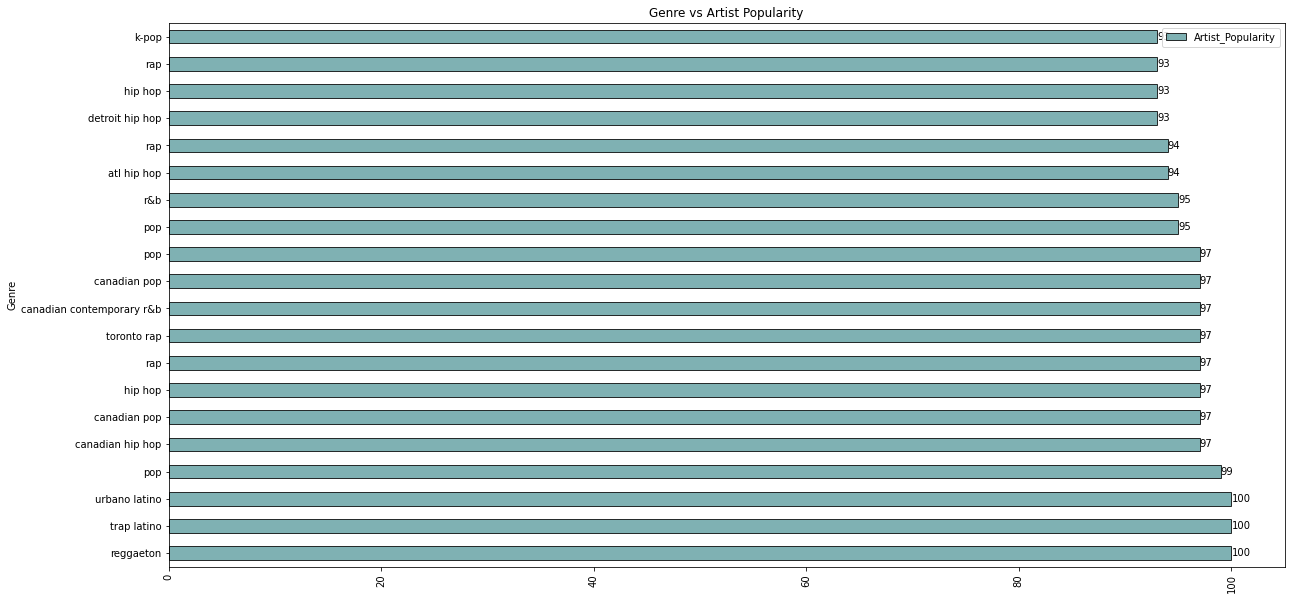

In [44]:
genre_graph_100 = merged_df_final_head.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Artist_Popularity',
                             title = 'Genre vs Artist Popularity',
                             xlabel = 'Genre',
                             ylabel = 'Artist Popularity',
                             kind = 'barh',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Performer',
                             y= 'Artist_Popularity',
                             title = 'Performer vs Artist Popularity',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'barh',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);


KeyboardInterrupt



In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Artist_Popularity',
                             title = 'Genre vs Artist Popularity',
                             xlabel = 'Genre',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Artist_Popularity',
                             title = 'Genre vs Artist Popularity',
                             xlabel = 'Genre',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
pop_genre = merged_df.loc[merged_df['Song_Popularity']>=0].sort_values(by = ['Genre'], ascending = False)
pop_genre

In [ ]:
gen_df = pop_genre.groupby(['Genre'])['Song_Popularity'].max().reset_index()
gen_df

In [ ]:
pop_genre = pop_genre.sort_values('Song_Popularity', ascending = False)
pop_genre

In [ ]:
genre_graph_100 = pop_genre.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Artist_Popularity',
                             title = 'Genre vs Artist Popularity',
                             xlabel = 'Genre',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# 1960

In [ ]:
merged_df_1960 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_1960 = merged_df_1960.loc[merged_df_1960['Year']>=1960].loc[merged_df_1960['Year']<=1969].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_1960

# 1970

In [ ]:
merged_df = merged_df.loc[merged_df['Genre']!='edm']

In [ ]:
merged_df_1970 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_1970 = merged_df_1970.loc[merged_df_1970['Year']>=1970].loc[merged_df_1970['Year']<=1979].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_1970

In [ ]:
merged_df_1980 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_1980 = merged_df_1980.loc[merged_df_1980['Year']>=1980].loc[merged_df_1980['Year']<=1989].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_1980

# 1980

In [ ]:
merged_df_1980 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_1980 = merged_df_1980.loc[merged_df_1980['Year']>=1980].loc[merged_df_1980['Year']<=1989].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_1980

# 1990

In [ ]:
merged_df = merged_df.loc[merged_df['Genre']!='viral rap']

In [ ]:
merged_df_1990 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_1990 = merged_df_1990.loc[merged_df_1990['Year']>=1990].loc[merged_df_1990['Year']<=1999].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_1990

# 2000

In [ ]:
merged_df_2000 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_2000 = merged_df_2000.loc[merged_df_2000['Year']>=2000].loc[merged_df_2000['Year']<=2009].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_2000

# 2010

In [ ]:
merged_df_2010 = merged_df.drop(columns=['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'url', 'WeekID', 'Week Position', 'Song_x', 'SongID', 'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Song_Popularity', 'Song_y', 'Duration ms', 'uri_y'] )
merged_df_2010 = merged_df_2010.loc[merged_df_2010['Year']>=2010].loc[merged_df_2010['Year']<=2022].sort_values(by = ['Explicit', 'Genre'], ascending = False).head(20)
merged_df_2010

In [ ]:
merged_df['Year'] = pd.to_numeric(merged_df['Year'])
merged_df['Genre'] = merged_df['Genre'].apply(literal_eval)
merged_df

# most popular artists debuted in 70s

In [ ]:
merged_df.loc[merged_df ['Year'] < 1980].loc[merged_df['Artist_Popularity'] >= 75]
merged_df

In [ ]:
merged_df = merged_df.loc[merged_df['Performer']!='M']
merged_df = merged_df.loc[merged_df['Performer']!='Malo']
merged_df = merged_df.loc[merged_df['Performer']!='Ocean']
merged_df = merged_df.loc[merged_df['Performer']!='Q']
merged_df = merged_df.loc[merged_df['Performer']!='Machine']
merged_df = merged_df.loc[merged_df['Performer']!='Pilot']
min_df = merged_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()
min_df

In [ ]:
min_df = merged_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()
min_df

In [ ]:
merged_df.loc[merged_df['Performer']=='Pilot']

In [ ]:
min_df = merged_df.groupby(['Genre', 'Explicit'])['Year'].min().reset_index()
min_df

# 1970

# Explicit 1970

In [ ]:
merged_df.loc[merged_df['Year']>=1970].loc[merged_df['Year']<=1979]

In [ ]:
min_df.sort_values(['Genre', 'Explicit', 'Year'])

In [ ]:
min_df = min_df.value_counts(['Genre', 'Explicit'])
min_df = pd.DataFrame(min_df)
min_df = min_df.head(20)
min_df

In [ ]:
merged_df = merged_df.loc[merged_df['Performer']!='Mina']
merged_df = merged_df.loc[merged_df['Performer']!='Oliver']
min_df = merged_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()


In [ ]:
merged_df.loc[merged_df['Performer']=='Oliver']

# 1960s

In [ ]:
min_df.loc[min_df['Year']>=1960].loc[min_df['Year']<=1969].sort_values('Artist_Popularity', ascending = False).head(5)

In [ ]:
merged_df = merged_df.loc[merged_df['Performer']!='Junior']
merged_df=merged_df.loc[merged_df['Performer']!='Chris Christian']
min_df = merged_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()

In [ ]:
merged_df.loc[merged_df['Performer']=='Chris Christian']

In [ ]:
merged_df = merged_df.sort_values('Artist_Popularity')
merged_df = merged_df.drop_duplicates()
merged_df = merged_df.head(100)
merged_df

In [ ]:
min_df.loc[min_df['Year']>=1960].loc[min_df['Year']<=1969].sort_values('Explicit', ascending = False)

# 1980s

In [ ]:
min_df.loc[min_df['Year']>=1980].loc[min_df['Year']<=1989].sort_values('Artist_Popularity', ascending = False).head(5)

In [ ]:
merged_df = merged_df.loc[merged_df['Performer']!='Five']
merged_df = merged_df.loc[merged_df['Performer']!='Link']
min_df = merged_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()

In [ ]:
min_df.loc[merged_df['Performer']=='Link']

# 1990s

In [ ]:
min_df.loc[min_df['Year']>=1990].loc[min_df['Year']<=1999].sort_values('Artist_Popularity', ascending = False).head(5)

# 2000s

In [ ]:
min_df.loc[min_df['Year']>=2000].loc[min_df['Year']<=2009].sort_values('Artist_Popularity', ascending = False).head(5)

# 2010s

In [ ]:
min_df.loc[min_df['Year']>=2010].loc[min_df['Year']<=2021].sort_values('Artist_Popularity', ascending = False).head(5)

In [ ]:
genre_graph_100 = merged_df.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Artist_Popularity',
                             title = 'Duration vs Artist Popularity',
                             xlabel = 'Duration ms',
                             ylabel = 'Artist Popularity',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [ ]:
merged_df['Duration s'] = merged_df['Duration ms']/1000
merged_df

In [ ]:
merged_df['Genre'] = merged_df['Genre'].apply(literal_eval)

In [ ]:
merged_df = merged_df.explode(column = "Genre")
merged_df = merged_df.dropna()

In [ ]:
popular_genres = merged_df['Genre'].value_counts().head(20).index.to_list()

In [ ]:
merged_df['WeekID'] = pd.to_datetime(merged_df['WeekID'])

In [ ]:
merged_df = merged_df.sort_values('WeekID')

In [ ]:
merged_df = merged_df.drop_duplicates(subset = 'uri', keep='first')
merged_df

In [ ]:
merged_df['Year'] = merged_df['WeekID'].dt.year
merged_df

In [ ]:
merged_df.loc[merged_df ['Year'] < 1960].loc[merged_df['Artist_Popularity'] >= 75]

# release_date genre

In [ ]:
merged_df.explode(column = 'Genre')

In [ ]:
merged_df = merged_df.explode(column = 'Genre')

In [ ]:
genre_df_2010 =genre_df[genre_df['Year'] >= 2010]['Genre'].value_counts()
pd.DataFrame(genre_df_2010)


In [ ]:
genre_df = genre_df.sort_values('Year',ascending = False)

In [ ]:
genre_df = genre_df.head(250)

In [1]:
# Genre vs Year

In [ ]:
genre_graph_100 = genre_df.plot(figsize=(20,10),
                             x= 'Genre',
                             y= 'Year',
                             title = 'Genre vs Year',
                             xlabel = 'Song Popularity',
                             ylabel = 'Year',
                             kind = 'scatter',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.8)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);